In [1]:
# Dependencies
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Paths to load the files

# Model temperature dataset
path_mod = 'data/cmems_mod_glo_bgc_my_0.25_P1M-m_1662689842699.nc'

# satellite observation dataset
path_sat = 'data/cmems_obs-oc_glo_bgc-plankton_my_l4-multi-4km_P1M_1662690105913.nc'

# satellite observation dataset
path_dino = 'data/cmems_obs-oc_glo_bgc-plankton_my_l4-multi-4km_P1M_1662691826432.nc'


# Products variables
mod = xr.open_dataset(path_mod)
sat = xr.open_dataset(path_sat)
dino = xr.open_dataset(path_dino)

In [3]:
sat


<xarray.Dataset>
Dimensions:  (time: 20, lat: 121, lon: 169)
Coordinates:
  * lon      (lon) float32 -79.02 -78.98 -78.94 -78.9 ... -72.1 -72.06 -72.02
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2016-08-01
  * lat      (lat) float32 -43.98 -44.02 -44.06 -44.1 ... -48.9 -48.94 -48.98
Data variables:
    CHL      (time, lat, lon) float32 ...
Attributes: (12/92)
    FROM_ORIGINAL_FILE__lon_step:                     0.041666668
    keywords:                                         EARTH SCIENCE > OCEANS ...
    cmems_product_id:                                 OCEANCOLOUR_GLO_BGC_L4_...
    FROM_ORIGINAL_FILE__lat_step:                     0.041666668
    grid_mapping:                                     Equirectangular
    title:                                            cmems_obs-oc_glo_bgc-pl...
    ...                                               ...
    FROM_ORIGINAL_FILE__westernmost_longitude:        -180.0
    geospatial_vertical_positive:                     up
    date_created:                                     2022-08-29T17:39:48Z
    nb_valid_bins:                                    19228487
    pct_valid_bins:                                   51.51665112740055
    _CoordSysBuilder:                                 ucar.nc2.dataset.conv.C...

In [4]:
# Target Variable. CHL or chlorophyll in sat 
chl_sat = sat.CHL

chl_sat

<xarray.DataArray 'CHL' (time: 20, lat: 121, lon: 169)>
[408980 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -79.02 -78.98 -78.94 -78.9 ... -72.1 -72.06 -72.02
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2016-08-01
  * lat      (lat) float32 -43.98 -44.02 -44.06 -44.1 ... -48.9 -48.94 -48.98
Attributes:
    input_files_reprocessings:  Processors versions: MODIS R2022.0NRT/VIIRSN ...
    type:                       surface
    ancillary_variables:        flags CHL_uncertainty
    standard_name:              mass_concentration_of_chlorophyll_a_in_sea_water
    long_name:                  Chlorophyll-a concentration - Mean of the bin...
    units:                      milligram m-3
    coverage_content_type:      modelResult
    _ChunkSizes:                [  1 256 256]

# Chlorophyll concentration 

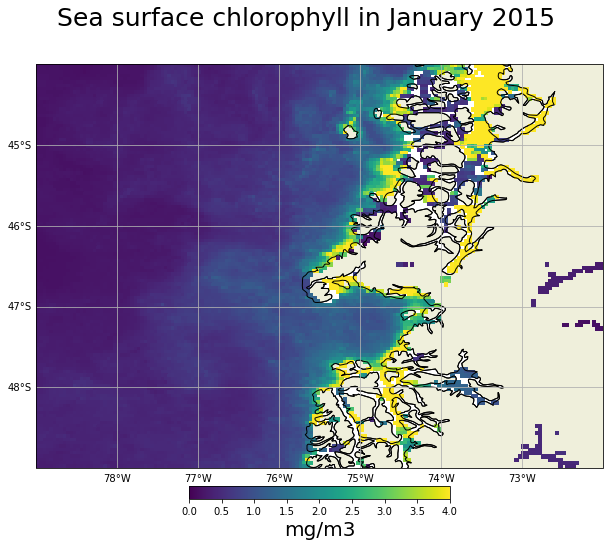

In [5]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
chl_sat = sat['CHL'].sel(time='2015-01-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(chl_sat['lon'].data, chl_sat['lat'].data,chl_sat,vmin=0,vmax=4,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface chlorophyll in January 2015',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/penas_chl_15-1.png')

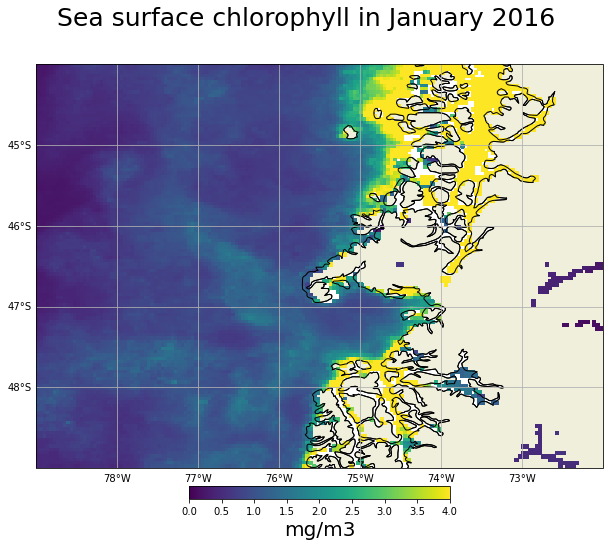

In [28]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
chl_sat = sat['CHL'].sel(time='2016-01-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(chl_sat['lon'].data, chl_sat['lat'].data,chl_sat,vmin=0,vmax=4,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface chlorophyll in January 2016',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/penas_chl_16-1.png')

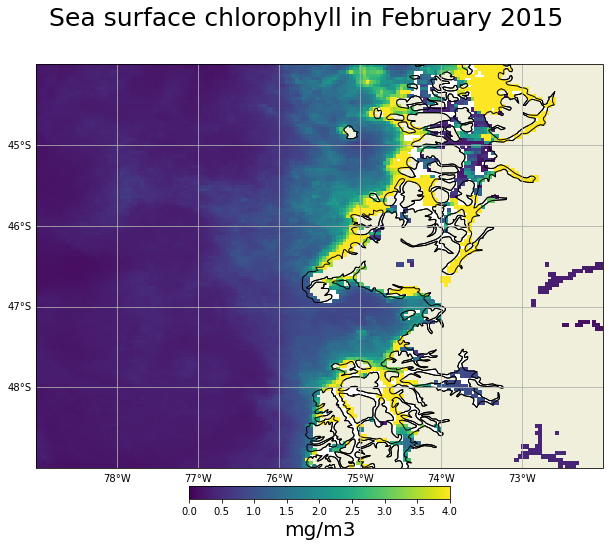

In [6]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
chl_sat = sat['CHL'].sel(time='2015-02-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(chl_sat['lon'].data, chl_sat['lat'].data,chl_sat,vmin=0,vmax=4,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface chlorophyll in February 2015',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/penas_chl_15-2.png')

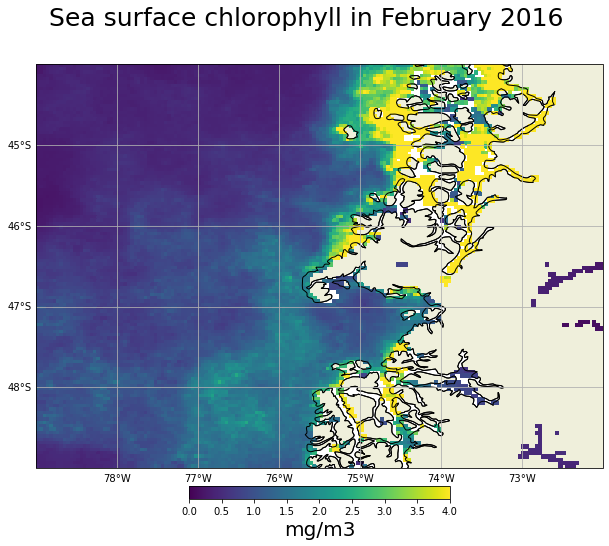

In [29]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
chl_sat = sat['CHL'].sel(time='2016-02-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(chl_sat['lon'].data, chl_sat['lat'].data,chl_sat,vmin=0,vmax=4,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface chlorophyll in February 2016',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/penas_chl_16-2.png')

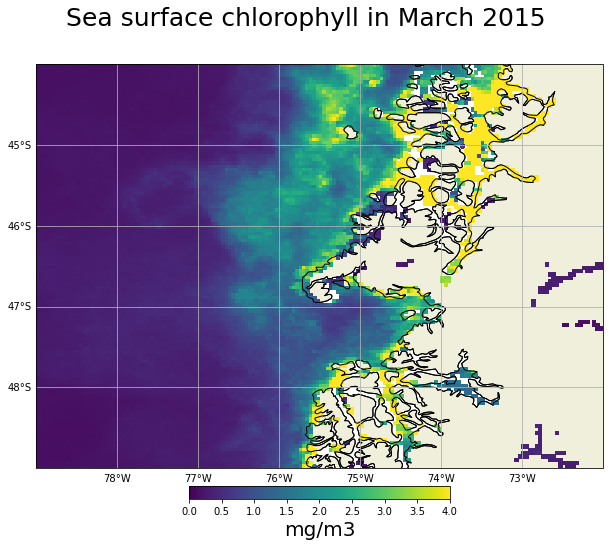

In [7]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
chl_sat = sat['CHL'].sel(time='2015-03-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(chl_sat['lon'].data, chl_sat['lat'].data,chl_sat,vmin=0,vmax=4,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface chlorophyll in March 2015',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/penas_chl_15-3.png')

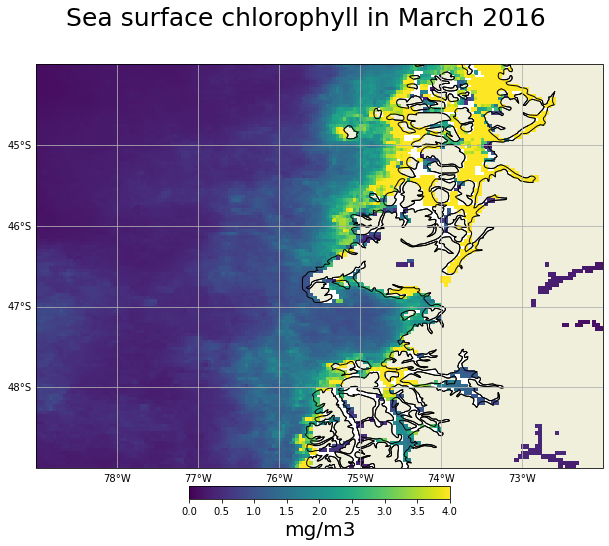

In [27]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
chl_sat = sat['CHL'].sel(time='2016-03-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(chl_sat['lon'].data, chl_sat['lat'].data,chl_sat,vmin=0,vmax=4,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface chlorophyll in March 2016',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/penas_chl_16-3.png')

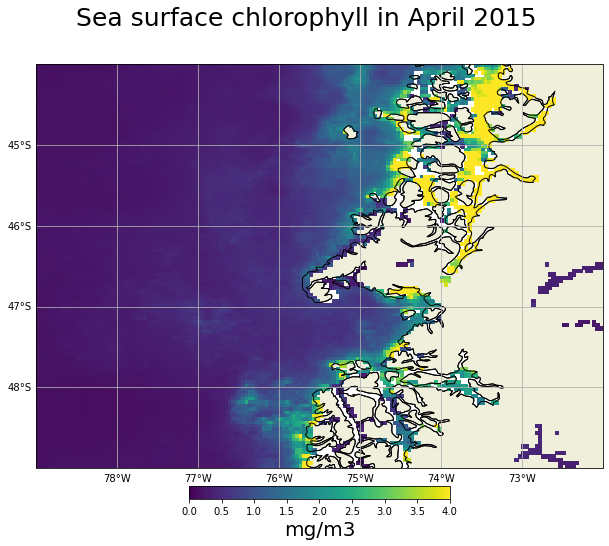

In [8]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
chl_sat = sat['CHL'].sel(time='2015-04-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(chl_sat['lon'].data, chl_sat['lat'].data,chl_sat,vmin=0,vmax=4,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface chlorophyll in April 2015',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/penas_chl_15-4.png')

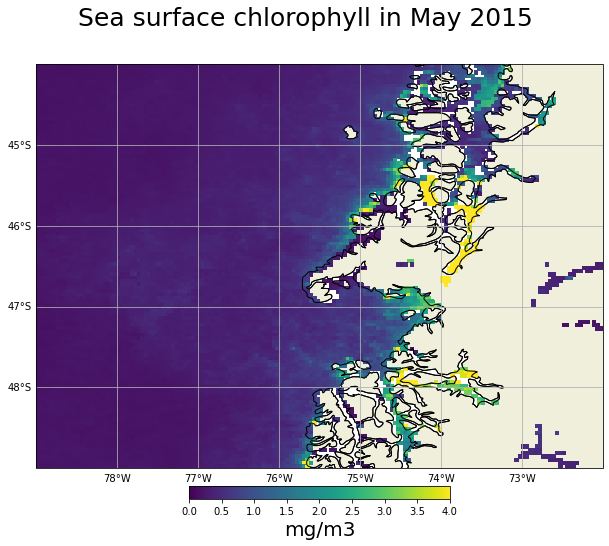

In [9]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
chl_sat = sat['CHL'].sel(time='2015-05-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(chl_sat['lon'].data, chl_sat['lat'].data,chl_sat,vmin=0,vmax=4,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface chlorophyll in May 2015',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/penas_chl_15-5.png')

### Vertical profile 

In [23]:
mod


<xarray.Dataset>
Dimensions:    (depth: 47, time: 19, latitude: 21, longitude: 29)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 ... 856.7 947.4 1.046e+03
  * latitude   (latitude) float32 -49.0 -48.75 -48.5 ... -44.5 -44.25 -44.0
  * time       (time) datetime64[ns] 2015-01-16T12:00:00 ... 2016-07-16T12:00:00
  * longitude  (longitude) float32 -79.0 -78.75 -78.5 ... -72.5 -72.25 -72.0
Data variables:
    chl        (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         Monthly mean fields for product GLOBAL_REA...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    dataset:                       global-reanalysis-bio-001-029-monthly
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [24]:
# Set the indexes of the measurments to consider
lon, lat = -75.4, 45

# Get the dates of these measures
date1, date2 = '2015-03-16', '2015-04-16'

# Select the temperature variable from the product at this point and time
chl_mod_1 = mod['chl'].sel(longitude=lon, latitude=lat, time=date1, method='nearest')
chl_mod_2 = mod['chl'].sel(longitude=lon, latitude=lat, time=date2, method='nearest')


chl_mod_1

<xarray.DataArray 'chl' (depth: 47)>
array([0.480025, 0.48008 , 0.480148, 0.480223, 0.480305, 0.480397, 0.480502,
       0.480639, 0.480939, 0.4809  , 0.479781, 0.473384, 0.455611, 0.4384  ,
       0.457019, 0.489871, 0.503336, 0.448681, 0.34706 , 0.270647, 0.225022,
       0.194271, 0.163808, 0.132231, 0.101604, 0.074962, 0.053855, 0.038714,
       0.028792, 0.022264, 0.017811, 0.014159, 0.011581, 0.00915 , 0.007075,
       0.005637, 0.00499 , 0.004944, 0.005126, 0.0054  , 0.005544, 0.005592,
       0.005326, 0.004608, 0.003939, 0.003381, 0.002953], dtype=float32)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 ... 856.7 947.4 1.046e+03
    latitude   float32 -44.0
    time       datetime64[ns] 2015-03-16T12:00:00
    longitude  float32 -75.5
Attributes:
    long_name:      Total Chlorophyll
    standard_name:  mass_concentration_of_chlorophyll_a_in_sea_water
    units:          mg m-3
    unit_long:      milligram of Chlorophyll per cubic meter
    _ChunkSizes:    [  1  15 137 288]

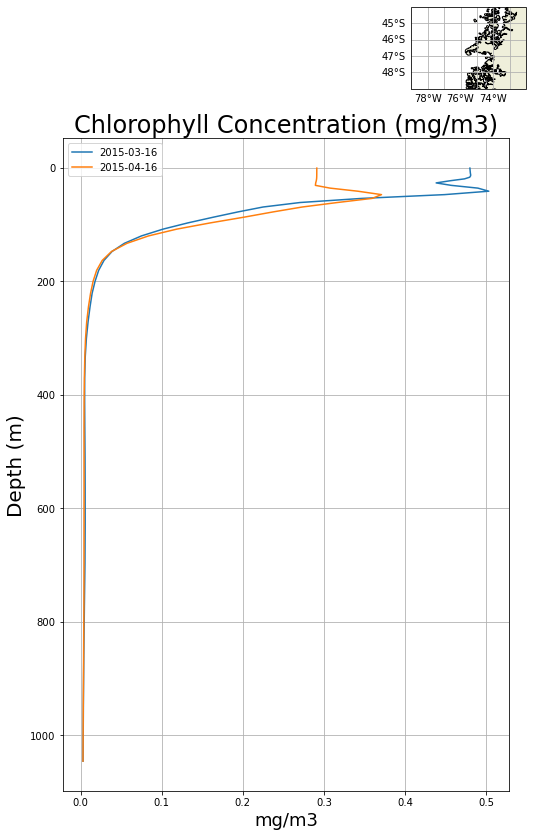

In [26]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(8,12))                                       # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.grid()                                                            # add the grid lines
ax.set_title("Chlorophyll Concentration (mg/m3)",fontsize=24)        # add the figure title
ax.invert_yaxis()                                                    # reverse the y axis
ax.set_xlabel("mg/m3",fontsize=18)                                   # set x axis label
ax.set_ylabel("Depth (m)",fontsize=20)                               # set y axis label 

im1 = ax.plot(chl_mod_1,chl_mod_1['depth'],label=date1)               # plot the vertical profile
im2 = ax.plot(chl_mod_2,chl_mod_2['depth'],label=date2)               # plot the vertical profile


# Display the locations of the glider on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.PlateCarree()) # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                  # add land mask 
ax_mini_map.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                 # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon, lat, 10,transform=ccrs.PlateCarree())                   # plot the first location
ax_mini_map.scatter(lon, lat, 10,transform=ccrs.PlateCarree())                   # plot the second location
ax.legend(loc="upper left")                                                      # add the legend

#Save figure
plt.savefig('images/temp/penas_chl_vertical_profile.png')

In [30]:
# Set the indexes of the measurments to consider
lon, lat = -75.4, 45

# Get the dates of these measures
date1, date2 = '2016-03-16', '2016-04-16'

# Select the temperature variable from the product at this point and time
chl_mod_1 = mod['chl'].sel(longitude=lon, latitude=lat, time=date1, method='nearest')
chl_mod_2 = mod['chl'].sel(longitude=lon, latitude=lat, time=date2, method='nearest')


chl_mod_1

<xarray.DataArray 'chl' (depth: 47)>
array([0.272856, 0.272849, 0.272839, 0.272827, 0.272813, 0.272796, 0.272776,
       0.272759, 0.272818, 0.272854, 0.272731, 0.272284, 0.271265, 0.27149 ,
       0.292503, 0.315991, 0.323397, 0.334673, 0.349113, 0.36431 , 0.323274,
       0.273354, 0.229001, 0.18369 , 0.133274, 0.079405, 0.041252, 0.028101,
       0.024164, 0.020768, 0.016245, 0.012597, 0.009954, 0.00777 , 0.006326,
       0.005396, 0.004839, 0.004611, 0.004932, 0.005787, 0.006752, 0.007316,
       0.007292, 0.00667 , 0.005503, 0.004187, 0.003259], dtype=float32)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 ... 856.7 947.4 1.046e+03
    latitude   float32 -44.0
    time       datetime64[ns] 2016-03-16T12:00:00
    longitude  float32 -75.5
Attributes:
    long_name:      Total Chlorophyll
    standard_name:  mass_concentration_of_chlorophyll_a_in_sea_water
    units:          mg m-3
    unit_long:      milligram of Chlorophyll per cubic meter
    _ChunkSizes:    [  1  15 137 288]

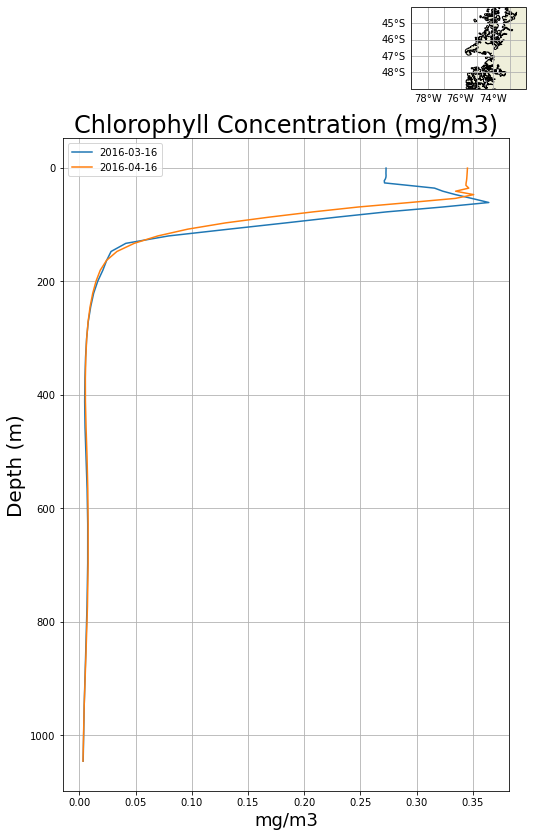

In [31]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(8,12))                                       # create a figure and define its size
ax = f.add_subplot(111)                                              # create the axes of the plot
ax.grid()                                                            # add the grid lines
ax.set_title("Chlorophyll Concentration (mg/m3)",fontsize=24)        # add the figure title
ax.invert_yaxis()                                                    # reverse the y axis
ax.set_xlabel("mg/m3",fontsize=18)                                   # set x axis label
ax.set_ylabel("Depth (m)",fontsize=20)                               # set y axis label 

im1 = ax.plot(chl_mod_1,chl_mod_1['depth'],label=date1)               # plot the vertical profile
im2 = ax.plot(chl_mod_2,chl_mod_2['depth'],label=date2)               # plot the vertical profile


# Display the locations of the glider on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.PlateCarree()) # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                     # add the coastlines
gl.right_labels = False                                                          # remove latitude labels on the right
gl.top_labels = False                                                            # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                  # add land mask 
ax_mini_map.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                 # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon, lat, 10,transform=ccrs.PlateCarree())                   # plot the first location
ax_mini_map.scatter(lon, lat, 10,transform=ccrs.PlateCarree())                   # plot the second location
ax.legend(loc="upper left")                                                      # add the legend

#Save figure
plt.savefig('images/temp/penas_chl_vertical_profile_2016.png')

# Dinoflagellate concentrarion

In [13]:
dino

<xarray.Dataset>
Dimensions:  (time: 20, lat: 121, lon: 169)
Coordinates:
  * lon      (lon) float32 -79.02 -78.98 -78.94 -78.9 ... -72.1 -72.06 -72.02
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2016-08-01
  * lat      (lat) float32 -43.98 -44.02 -44.06 -44.1 ... -48.9 -48.94 -48.98
Data variables:
    DINO     (time, lat, lon) float32 ...
Attributes: (12/92)
    FROM_ORIGINAL_FILE__lon_step:                     0.041666668
    keywords:                                         EARTH SCIENCE > OCEANS ...
    cmems_product_id:                                 OCEANCOLOUR_GLO_BGC_L4_...
    FROM_ORIGINAL_FILE__lat_step:                     0.041666668
    grid_mapping:                                     Equirectangular
    title:                                            cmems_obs-oc_glo_bgc-pl...
    ...                                               ...
    FROM_ORIGINAL_FILE__westernmost_longitude:        -180.0
    geospatial_vertical_positive:                     up
    date_created:                                     2022-08-29T17:39:48Z
    nb_valid_bins:                                    19228487
    pct_valid_bins:                                   51.51665112740055
    _CoordSysBuilder:                                 ucar.nc2.dataset.conv.C...

In [11]:
# Target Variable. CHL or chlorophyll in sat 
dino_sat = dino.DINO

dino_sat

<xarray.DataArray 'DINO' (time: 20, lat: 121, lon: 169)>
[408980 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -79.02 -78.98 -78.94 -78.9 ... -72.1 -72.06 -72.02
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2016-08-01
  * lat      (lat) float32 -43.98 -44.02 -44.06 -44.1 ... -48.9 -48.94 -48.98
Attributes:
    input_files_reprocessings:  Processor version: OLCIA 07.02
    type:                       surface
    ancillary_variables:        flags DINO_uncertainty
    standard_name:              mass_concentration_of_dinophytes_expressed_as...
    units:                      milligram m^-3
    long_name:                  Dinophytes Chlorophyll a concentration - Mean...
    coverage_content_type:      modelResult
    _ChunkSizes:                [  1 256 256]

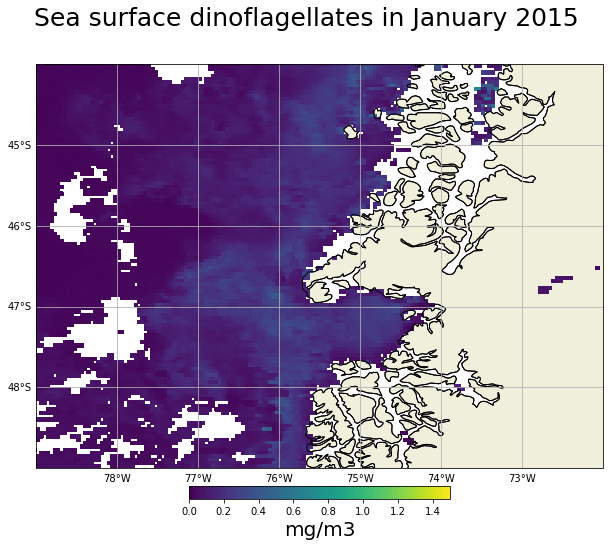

In [14]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
dino_sat = dino['DINO'].sel(time='2015-01-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(dino_sat['lon'].data, dino_sat['lat'].data,dino_sat,vmin=0,vmax=1.5,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface dinoflagellates in January 2015',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/dino_15_1.png')

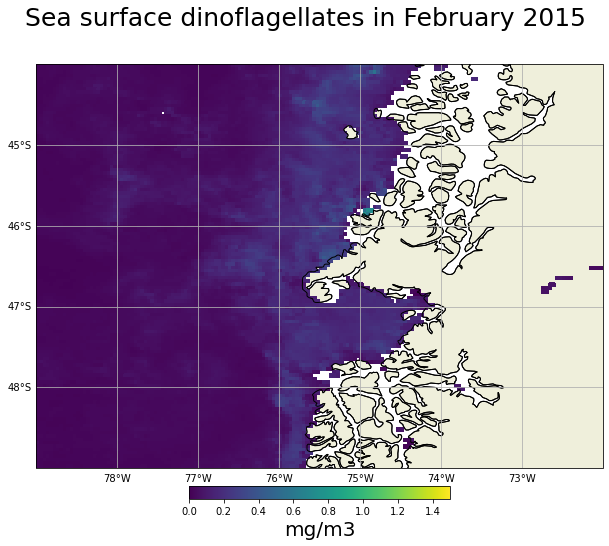

In [15]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
dino_sat = dino['DINO'].sel(time='2015-02-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(dino_sat['lon'].data, dino_sat['lat'].data,dino_sat,vmin=0,vmax=1.5,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface dinoflagellates in February 2015',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/dino_15_2.png')

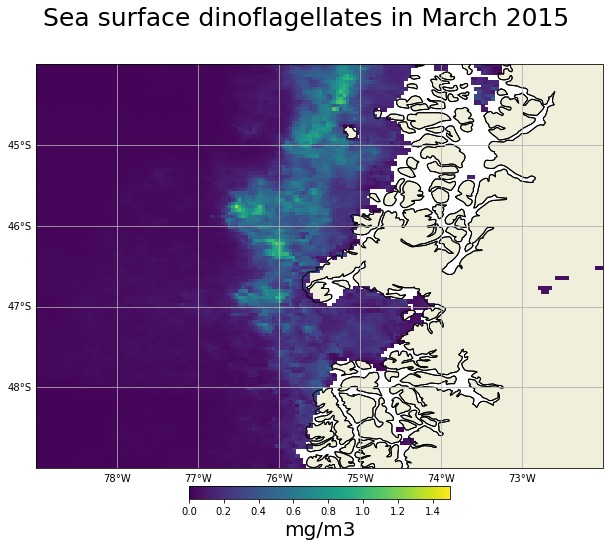

In [17]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
dino_sat = dino['DINO'].sel(time='2015-03-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(dino_sat['lon'].data, dino_sat['lat'].data,dino_sat,vmin=0,vmax=1.5,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface dinoflagellates in March 2015',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/dino_15_3.png')

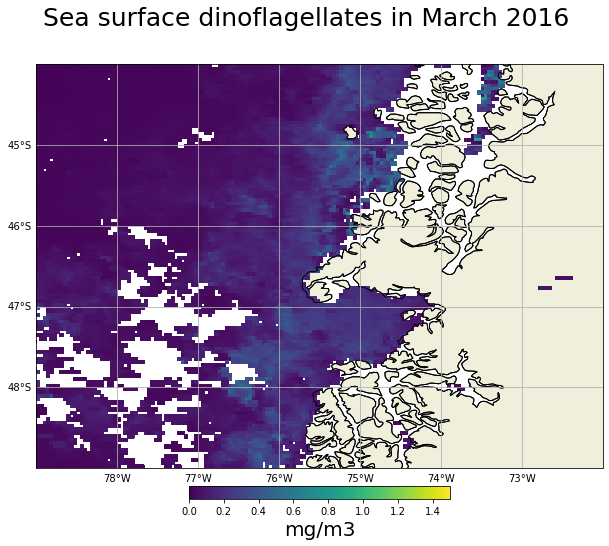

In [32]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
dino_sat = dino['DINO'].sel(time='2016-03-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(dino_sat['lon'].data, dino_sat['lat'].data,dino_sat,vmin=0,vmax=1.5,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface dinoflagellates in March 2016',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/dino_16_3.png')

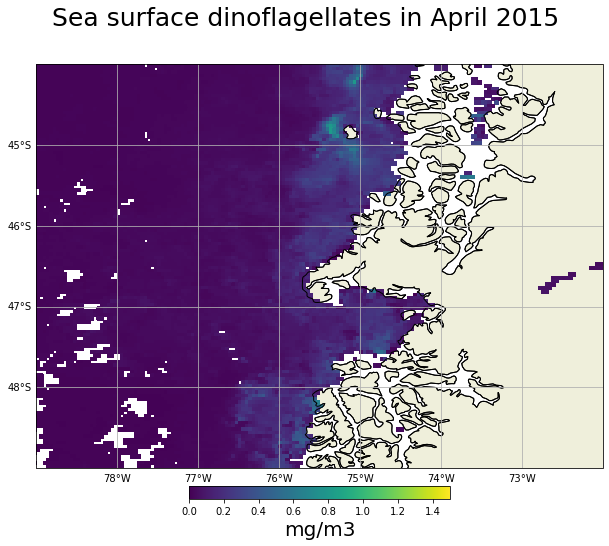

In [18]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
dino_sat = dino['DINO'].sel(time='2015-04-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(dino_sat['lon'].data, dino_sat['lat'].data,dino_sat,vmin=0,vmax=1.5,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface dinoflagellates in April 2015',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/dino_15_4.png')

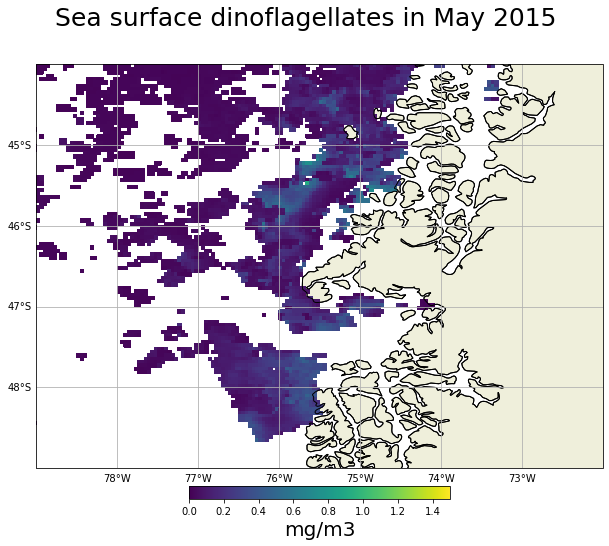

In [22]:
# Select the temperature parameter, at the date and depth we want, and store it in a variable.
dino_sat = dino['DINO'].sel(time='2015-05-01').squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([-79, -72, -44, -49],crs=ccrs.PlateCarree())                            # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(dino_sat['lon'].data, dino_sat['lat'].data,dino_sat,vmin=0,vmax=1.5,cmap='viridis')
    

# Add the titles and a legend
f.suptitle('Sea surface dinoflagellates in May 2015',fontsize=25)                 # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.03,pad=0.04,orientation='horizontal')       # add the colorbar
cbar.set_label('mg/m3', fontsize=20)                                              # add the title of the colorbar

# Save figure
plt.savefig('images/chl-dino/dino_15_5.png')